In [64]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
%matplotlib inline

In [65]:
import numpy as np

class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    C       : float
      Regularization coeffiecient
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def __init__(self, num_iter, lr, no_bias, verbose, C=1.0, random_state=0):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.C = C
        self.random_state = random_state
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _hypothesis_function(self, X):
        parameters = np.insert(self.coef_, 0, self.bias_, axis=0)
        z = np.matmul(X, parameters.T)
        h = 1 / (1 + np.exp(-z))
        return h

    def _loss_function(self, X, y):
        m = y.shape[0]
        parameters = np.insert(self.coef_, 0, self.bias_, axis=0)
        y_pred = self._hypothesis_function(X)
        return 1/m* np.sum( -np.multiply(y, np.log(y_pred)) - np.multiply((1-y), np.log(1-y_pred)) ) + self.C/(2*m) * np.sum(np.power(parameters,2))

    def _gradient_descent(self, X, y, X_val=None, y_val=None):
        m = X.shape[0]

        parameters = np.insert(self.coef_, 0, self.bias_, axis=0)
        y_pred = self._hypothesis_function(X)
        grad = 1/m * np.matmul( np.subtract(y_pred,y).T , X )
        self.bias_ = self.bias_ - self.lr*grad[0]
        self.coef_ = self.coef_ - self.lr*(grad[1:] + self.C/m * self.coef_)

    def _linear_combination(self, X):
        bias = np.ones(X.shape[0]) if not self.no_bias else np.zeros(X.shape[0])
        return np.concatenate([bias.reshape(-1, 1), X], axis=1)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            訓練データのFeature value
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            検証データのFeature value
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        n_samples = X.shape[0]
        n_features = X.shape[1]

        # Generalize labels
        self.ylabel = np.unique(y)
        y = np.where(y == self.ylabel[0], 0, 1)
        if y_val is not None:
            y_val = np.where(y_val == self.ylabel[0], 0, 1)

        # Add bias
        X = self._linear_combination(X)
        if X_val is not None:
            X_val = self._linear_combination(X_val)

        # Init thetas
        np.random.seed(self.random_state)
        self.coef_ = np.random.randn(X.shape[1]-1)
        self.bias_ = np.random.randn(1)

        for i in range(self.iter):
            self._gradient_descent(X, y)

            self.loss[i] = self._loss_function(X, y)
            if X_val is not None and y_val is not None:
                self.val_loss[i] = self._loss_function(X_val, y_val)
            
            if self.verbose:
              if not self.no_bias:
                print(f'iteration: {i} loss: {self.loss[i]} theta: {self.bias_.tolist()+self.coef_.tolist()}')
              else:
                print(f'iteration: {i} loss: {self.loss[i]} theta: {self.coef_}')

    def predict(self, X):
        """
        ロジスティック回帰を使いlabelを推定する。
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        y_pred = self.predict_proba(X)
        return np.where(y_pred < 0.5, self.ylabel[0], self.ylabel[1])

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        X = self._linear_combination(X)
        return self._hypothesis_function(X)

### **Problem 5**

### Learning and estimation

### Load Iris dataset 

In [66]:
X, y = load_iris(return_X_y=True)

index = np.logical_or(y == 1, y == 2)

X, y = X[index], y[index]

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

#### Fit on the scratch model

iteration: 0 loss: 10.1387631950693 theta: [1.8625579901735225, 1.734369339549291, 0.3862446887732529, 0.9576031419426535, 2.234025587577887]
iteration: 1 loss: 9.97934745704223 theta: [1.8575579902046953, 1.7046900435473422, 0.37233390826283247, 0.9364709416625983, 2.22715883441437]
iteration: 2 loss: 9.819971267313822 theta: [1.852557990245969, 1.675014457511342, 0.35842486662468986, 0.9153413829444912, 2.220292939606432]
iteration: 3 loss: 9.66063457154637 theta: [1.8475579903006436, 1.6453425809952817, 0.34451756364960684, 0.8942144654703361, 2.213427903050556]
iteration: 4 loss: 9.501337355720826 theta: [1.8425579903731064, 1.6156744135590941, 0.33061199913109734, 0.8730901889262461, 2.206563724644497]
iteration: 5 loss: 9.342079623731939 theta: [1.837557990469194, 1.5860099547706228, 0.31670817286631553, 0.851968553003814, 2.199700404287707]
iteration: 6 loss: 9.18286136610551 theta: [1.8325579905966758, 1.5563492042082605, 0.30280608465727127, 0.8308495574019492, 2.1928379418819

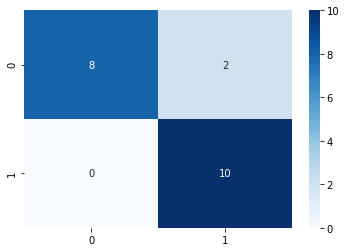

In [68]:
SLR = ScratchLogisticRegression(1000, 0.01, False, True)
SLR.fit(X_train, y_train, X_val, y_val)
y_pred = SLR.predict(X_val)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), cmap=plt.cm.Blues, annot=True)

#### Fit on Logistic Regression of sklearn

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



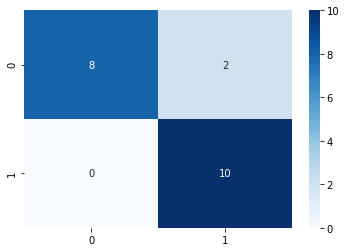

In [69]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), cmap=plt.cm.Blues, annot=True)

### **Problem 6**

### Plot of learning curve

In [70]:
def plot_learning_curve(model):
    train_loss = model.loss
    val_loss = model.val_loss
    plt.figure(figsize=(16, 8))
    plt.plot(train_loss, label="train_loss", linewidth=5)
    if val_loss is not None:
        plt.plot(val_loss, label="val_loss", linewidth=5)
    plt.xlabel("iter")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

### Plot learning curve

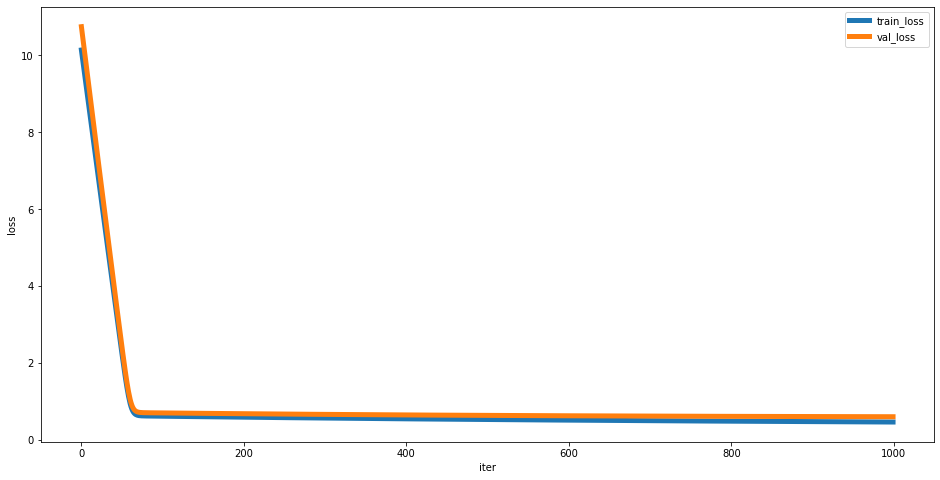

In [71]:
plot_learning_curve(SLR)

### **Problem 7**

### Visualization of decision area

In [72]:
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

def decision_region(X, y, model, step=0.01,
                    title="Decision region",
                    xlabel="xlabel",
                    ylabel="ylabel",
                    targets=[0, 1]):
    # Setting
    scatter_colors = ["red", "blue"]
    n_class = len(targets)
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0]) - 0.5, np.max(X[:,0]) + 0.5, step),
                                   np.arange(np.min(X[:,1]) - 0.5, np.max(X[:,1]) + 0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # Plot
    plt.figure(figsize=(16, 9))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class - 1, colors='y', alpha=0.5)

    for i, target in enumerate(set(y)):
        plt.scatter(X[y == target][:, 0], X[y == target][:, 1], s=80, 
                    color=scatter_colors[i], label=targets[i], marker='o')
    patches = [Patch(color=scatter_colors[i], label=targets[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

### Perform dimension reduction for visualizing

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_transform = pca.fit_transform(X)

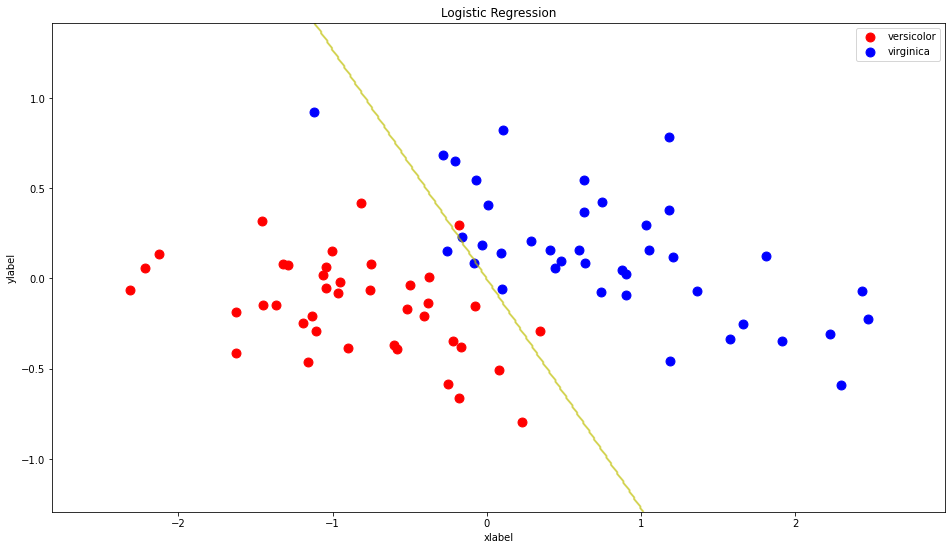

In [74]:
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X_transform, y, test_size=0.2, random_state=0)
clf1 = ScratchLogisticRegression(num_iter=5000, lr=0.01, no_bias=True, verbose=False, random_state=0)
clf1.fit(X_train, y_train, X_val, y_val)
decision_region(X_train, y_train, clf1, title="Logistic Regression", targets=["versicolor", "virginica"])